In [202]:
from cosmiclib import Compressor, Optimizer
import plotly.express as px
import pandas as pd
import numpy as np

In [203]:
def make_row(Qtot, sol_dict):
    dict_data = {'Qtot': [Qtot]}
    dict_data.update({f'{c}: q': [sol_dict['compressors'][c]['q']] for c in comp_names})
    dict_data.update({f'{c}: w': [sol_dict['compressors'][c]['w']] for c in comp_names})
    return pd.DataFrame(dict_data)

compressor1 = Compressor('Compressor 1', qmin=0.5, qmax=1, wmin=0.5, wmax=1)
compressor2 = Compressor('Compressor 2', qmin=0.5, qmax=0.75, wmin=0.75, wmax=7/8)
compressors = [compressor1, compressor2]
Qmax = sum([c.qmax for c in compressors])
comp_names = [c.name for c in compressors]
my_optimizer = Optimizer(compressors=compressors)
my_optimizer.setup_problem()

df = None
Qmax_plot = Qmax * 1.1
for Qtot in np.arange(0,Qmax_plot,0.001):
    solution = my_optimizer.find_opt(Qtot)
    if df is None:
        df = make_row(Qtot, solution)
    else:
        df = pd.concat([df, make_row(Qtot, solution)])
#df.set_index('Qtot')


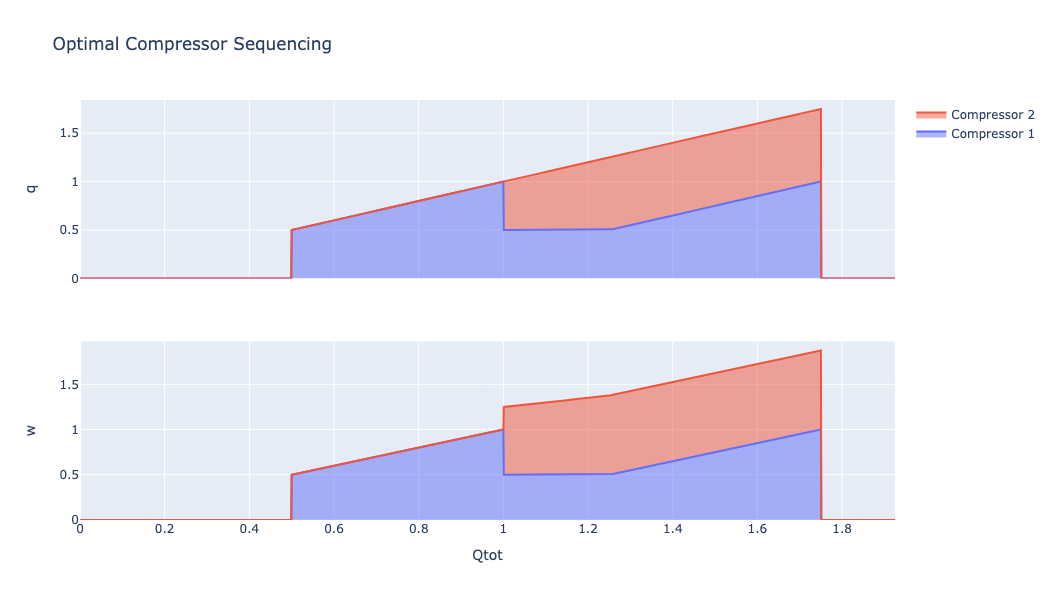

In [205]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# Create a stacked area chart
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)
colors = px.colors.qualitative.Plotly
for i, c in enumerate(comp_names):
    fig.add_trace(go.Scatter(x=df['Qtot'], y=df[f'{c}: q'], stackgroup='1', name=c, line=dict(color=colors[i])), row=1, col=1)
    fig.add_trace(go.Scatter(x=df['Qtot'], y=df[f'{c}: w'], stackgroup='1', name=c, line=dict(color=colors[i]), showlegend=False), row=2, col=1)
# Customize the chart layout
fig.update_layout(title='Optimal Compressor Sequencing', xaxis2_title='Qtot', yaxis_title='q', yaxis2_title='w', height=600)

# Display the chart
fig.show()